# League of Legends Ranked Analysis

### Importing libraries

In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('ggplot')

### Retrieving data

In [205]:
main_df = pd.read_csv("season10_data.csv", index_col=0)

In [206]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 816
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_date          817 non-null    object 
 1   match_map           817 non-null    object 
 2   match_mode          614 non-null    object 
 3   match_duration      817 non-null    float64
 4   match_result        817 non-null    object 
 5   champ_name          817 non-null    object 
 6   champ_kills         817 non-null    int64  
 7   champ_deaths        817 non-null    int64  
 8   champ_assists       817 non-null    int64  
 9   champ_farm          817 non-null    int64  
 10  champ_gold          817 non-null    int64  
 11  champ_level         817 non-null    int64  
 12  champ_first_spell   817 non-null    object 
 13  champ_second_spell  817 non-null    object 
dtypes: float64(1), int64(6), object(7)
memory usage: 95.7+ KB


In [207]:
main_df.match_date = pd.to_datetime(main_df.match_date)

In [208]:
main_df.head()

,match_date,match_map,match_mode,match_duration,match_result,champ_name,champ_kills,champ_deaths,champ_assists,champ_farm,champ_gold,champ_level,champ_first_spell,champ_second_spell
0,2020-07-09,Summoner's Rift,Normal (Draft Mode),36.583333,defeat,Miss Fortune,7,10,9,164,12200,15,SummonerHeal,SummonerFlash
1,2020-07-09,Howling Abyss,NaN,31.066667,victory,Miss Fortune,20,9,33,172,22100,18,SummonerHeal,SummonerFlash
2,2020-07-09,Summoner's Rift,Ranked (Draft Mode),36.066667,victory,Xayah,12,4,4,269,17400,16,SummonerHeal,SummonerFlash
3,2020-07-08,Summoner's Rift,Normal (Draft Mode),30.533333,defeat,Miss Fortune,6,6,7,188,11000,13,SummonerHeal,SummonerFlash
4,2020-07-08,Summoner's Rift,Normal (Draft Mode),3.333333,earlysurrender,Xayah,0,0,1,16,1200,3,SummonerHeal,SummonerFlash


In [209]:
print("Number of matches: {}".format(len(main_df)))

Number of matches: 817


### Getting ranked matches only

In [210]:
ranked_df = main_df[main_df.match_mode == "Ranked (Draft Mode)"]

In [211]:
ranked_df.head()

,match_date,match_map,match_mode,match_duration,match_result,champ_name,champ_kills,champ_deaths,champ_assists,champ_farm,champ_gold,champ_level,champ_first_spell,champ_second_spell
2,2020-07-09,Summoner's Rift,Ranked (Draft Mode),36.066667,victory,Xayah,12,4,4,269,17400,16,SummonerHeal,SummonerFlash
14,2020-07-04,Summoner's Rift,Ranked (Draft Mode),34.950000,victory,Caitlyn,12,5,9,180,15100,16,SummonerHeal,SummonerFlash
15,2020-07-04,Summoner's Rift,Ranked (Draft Mode),41.033333,defeat,Aphelios,7,9,10,228,14200,16,SummonerHeal,SummonerFlash
16,2020-07-03,Summoner's Rift,Ranked (Draft Mode),27.800000,defeat,Caitlyn,4,7,15,128,9200,13,SummonerHeal,SummonerFlash
17,2020-07-03,Summoner's Rift,Ranked (Draft Mode),35.450000,victory,Xayah,8,5,7,260,15100,16,SummonerHeal,SummonerFlash


In [212]:
print("Number of matches: {}".format(len(ranked_df)))

Number of matches: 250


### Getting only valid matches (when there is no early surrender)

In [213]:
ranked_df.match_result.value_counts()

victory           135
defeat            108
earlysurrender      7
Name: match_result, dtype: int64

In [214]:
valid_ranked_df = ranked_df[ranked_df.match_result != "earlysurrender"]

In [215]:
valid_ranked_df.head()

,match_date,match_map,match_mode,match_duration,match_result,champ_name,champ_kills,champ_deaths,champ_assists,champ_farm,champ_gold,champ_level,champ_first_spell,champ_second_spell
2,2020-07-09,Summoner's Rift,Ranked (Draft Mode),36.066667,victory,Xayah,12,4,4,269,17400,16,SummonerHeal,SummonerFlash
14,2020-07-04,Summoner's Rift,Ranked (Draft Mode),34.950000,victory,Caitlyn,12,5,9,180,15100,16,SummonerHeal,SummonerFlash
15,2020-07-04,Summoner's Rift,Ranked (Draft Mode),41.033333,defeat,Aphelios,7,9,10,228,14200,16,SummonerHeal,SummonerFlash
16,2020-07-03,Summoner's Rift,Ranked (Draft Mode),27.800000,defeat,Caitlyn,4,7,15,128,9200,13,SummonerHeal,SummonerFlash
17,2020-07-03,Summoner's Rift,Ranked (Draft Mode),35.450000,victory,Xayah,8,5,7,260,15100,16,SummonerHeal,SummonerFlash


In [216]:
print("Number of matches: {}".format(len(valid_ranked_df)))

Number of matches: 243


### Getting only ADC matches

In [217]:
valid_ranked_df.champ_name.value_counts().index

Index(['Aphelios', 'Miss Fortune', 'Caitlyn', 'Xayah', 'Ezreal', 'Ashe',
       'Thresh', 'Heimerdinger', 'Lucian', 'Jinx', 'Varus', 'Veigar', 'Kai'Sa',
       'Syndra', 'Corki'],
      dtype='object')

In [218]:
adc_played_champs = ["Aphelios", "Miss Fortune", "Caitlyn", 
                     "Xayah", "Ezreal", "Ashe", "Lucian", 
                     "Jinx", "Varus", "Kai'Sa", "Syndra"]

In [219]:
adc_ranked_df = valid_ranked_df[valid_ranked_df.champ_name.isin(adc_played_champs)]

In [220]:
adc_ranked_df.head()

,match_date,match_map,match_mode,match_duration,match_result,champ_name,champ_kills,champ_deaths,champ_assists,champ_farm,champ_gold,champ_level,champ_first_spell,champ_second_spell
2,2020-07-09,Summoner's Rift,Ranked (Draft Mode),36.066667,victory,Xayah,12,4,4,269,17400,16,SummonerHeal,SummonerFlash
14,2020-07-04,Summoner's Rift,Ranked (Draft Mode),34.950000,victory,Caitlyn,12,5,9,180,15100,16,SummonerHeal,SummonerFlash
15,2020-07-04,Summoner's Rift,Ranked (Draft Mode),41.033333,defeat,Aphelios,7,9,10,228,14200,16,SummonerHeal,SummonerFlash
16,2020-07-03,Summoner's Rift,Ranked (Draft Mode),27.800000,defeat,Caitlyn,4,7,15,128,9200,13,SummonerHeal,SummonerFlash
17,2020-07-03,Summoner's Rift,Ranked (Draft Mode),35.450000,victory,Xayah,8,5,7,260,15100,16,SummonerHeal,SummonerFlash


In [221]:
print("Number of matches: {}".format(len(adc_ranked_df)))

Number of matches: 233


## Statistics

Texto sobre

### Main KDA stats

In [222]:
np.mean(adc_ranked_df.champ_kills), np.mean(adc_ranked_df.champ_deaths), np.mean(adc_ranked_df.champ_assists)

(6.618025751072961, 4.600858369098712, 7.639484978540772)

### Farm per minute stats

In [223]:
np.mean(adc_ranked_df.champ_farm/adc_ranked_df.match_duration)

6.292555313310706

### Winrate stats

In [224]:
adc_ranked_df.match_result.value_counts()["victory"]*100/len(adc_ranked_df.match_result)

55.36480686695279

### Gold stats

In [385]:
np.mean(adc_ranked_df.champ_gold/adc_ranked_df.match_duration)

388.85158340172717

## Most Played Champions

In [225]:
adc_ranked_df.champ_name.value_counts()[:3]

Aphelios        73
Miss Fortune    64
Caitlyn         55
Name: champ_name, dtype: int64

### Statistics on each of the Top 3 champions

### Miss Fortune

In [226]:
mf_df = adc_ranked_df[adc_ranked_df.champ_name == "Miss Fortune"]

#### KDA

In [227]:
np.mean(mf_df.champ_kills), np.mean(mf_df.champ_deaths), np.mean(mf_df.champ_assists)

(7.484375, 4.203125, 7.5)

#### Pickrate

In [228]:
len(mf_df)*100/len(adc_ranked_df)

27.467811158798284

#### Winrate

In [229]:
mf_df.match_result.value_counts()["victory"]*100/len(mf_df.match_result)

67.1875

### Aphelios

In [230]:
aphe_df = adc_ranked_df[adc_ranked_df.champ_name == "Aphelios"]

#### KDA

In [231]:
np.mean(aphe_df.champ_kills), np.mean(aphe_df.champ_deaths), np.mean(aphe_df.champ_assists)

(6.082191780821918, 4.931506849315069, 7.534246575342466)

#### Pickrate

In [232]:
len(aphe_df)*100/len(adc_ranked_df)

31.330472103004293

#### Winrate

In [233]:
aphe_df.match_result.value_counts()["victory"]*100/len(aphe_df.match_result)

49.31506849315068

### Caitlyn

In [234]:
cait_df = adc_ranked_df[adc_ranked_df.champ_name == "Caitlyn"]

#### KDA

In [235]:
np.mean(cait_df.champ_kills), np.mean(cait_df.champ_deaths), np.mean(cait_df.champ_assists)

(7.218181818181818, 4.3090909090909095, 7.963636363636364)

#### Pickrate

In [236]:
len(cait_df)*100/len(adc_ranked_df)

23.605150214592275

#### Winrate

In [237]:
cait_df.match_result.value_counts()["victory"]*100/len(cait_df.match_result)

52.72727272727273

## Plotting monthly growth

#### Monthly DataFrames

In [295]:
march_df = adc_ranked_df[adc_ranked_df.match_date.dt.month == 3]

In [296]:
april_df = adc_ranked_df[adc_ranked_df.match_date.dt.month == 4]

In [297]:
may_df = adc_ranked_df[adc_ranked_df.match_date.dt.month == 5]

In [298]:
june_df = adc_ranked_df[adc_ranked_df.match_date.dt.month == 6]

In [299]:
july_df = adc_ranked_df[adc_ranked_df.match_date.dt.month == 7]

In [329]:
month_list = [march_df, april_df, may_df, june_df, july_df]
month_name_list = ["March", "April", "May", "June", "July"]

### Farm

#### Farm stats per month

In [312]:
def get_farm_by_month_df(month_df_list):
    results = []
    for month_df in month_df_list:
        result = np.mean(month_df.champ_farm/month_df.match_duration)
        results.append(result)
    return results

In [319]:
farm_list = get_farm_by_month_df(month_list)

#### Plot

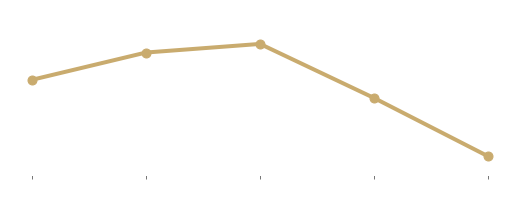

In [380]:
fig, ax = plt.subplots(figsize=(9,2.8))
ax.text("March", 6.29, str(farm_list[0])[:4], rotation=45, fontsize=16, color='white')
ax.text("April", 6.40, str(farm_list[1])[:4], rotation=45, fontsize=16, color='white')
ax.text("May", 6.43, str(farm_list[2])[:4], rotation=45, fontsize=16, color='white')
ax.text("June", 6.20, str(farm_list[3])[:4], rotation=45, fontsize=16, color='white')
ax.text("July", 5.95, str(farm_list[4])[:4], rotation=45, fontsize=16, color='white')
ax.patch.set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for label in (ax.get_xticklabels()):
    label.set_fontsize(16)
    label.set_color("white")
    
for tick in ax.axes.get_yticklines():
    tick.set_visible(False)

ax.set_ylim(5.85, 6.5)
    
ax.plot(month_name_list, farm_list, color="#c9ab6e", linewidth=4, marker='o', markersize=9)
plt.savefig('demo.png', transparent=True)

### Winrate

#### Winrate stats per month

In [381]:
def get_winrate_by_month_df(month_df_list):
    results = []
    for month_df in month_df_list:
        result = month_df.match_result.value_counts()["victory"]*100/len(month_df.match_result)
        results.append(result)
    return results

In [382]:
winrate_list = get_winrate_by_month_df(month_list)

#### Plot

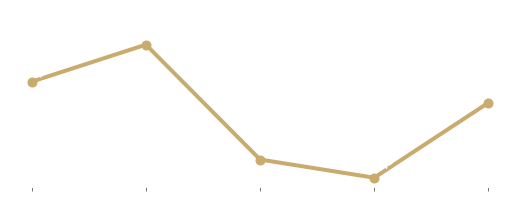

In [384]:
fig, ax = plt.subplots(figsize=(9,2.8))
ax.text("March", 56.1, str(winrate_list[0])[:4], rotation=45, fontsize=16, color='white')
ax.text("April", 60.0, str(winrate_list[1])[:4], rotation=45, fontsize=16, color='white')
ax.text("May", 48.0, str(winrate_list[2])[:4], rotation=45, fontsize=16, color='white')
ax.text("June", 46.1, str(winrate_list[3])[:4], rotation=45, fontsize=16, color='white')
ax.text("July", 54.1, str(winrate_list[4])[:4], rotation=45, fontsize=16, color='white')
ax.patch.set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for label in (ax.get_xticklabels()):
    label.set_fontsize(16)
    label.set_color("white")

ax.set_ylim(44.5, 60.5)
    
ax.plot(month_name_list, winrate_list, color="#c9ab6e", linewidth=4, marker='o', markersize=9)
plt.savefig('demo2.png', transparent=True)